**import libararies**

In [1]:
#import libararies
# Pandas for DataFrames
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

**Dataset**

In [2]:
#import excel file
df = pd.read_excel('Patient_Readm_Rate.xlsx')

In [3]:
# Building interactive Dataframe in Google
#%load_ext google.colab.data_table
#%unload_ext google.colab.data_table

In [4]:
# Displaying the data
#df

In [5]:
# Displaying the first 5 rows of the DataFrame
df.head(5)

,patient_key_code_number,weekday,month,depression,sex,ethnic_group_c,marital_status_c,insurance_provider,icu_yn,tobacco_user,...,vent,los,LACE_Score,readmit30,APRDRG,Condition,care_plan_following_discharge,cost_of_initial_stay,care_plan_costs,cost_of_readmission
0,1,Tuesday,December,0,M,not_hispanic,married,medicare,0,Never,...,0,9.973955,11.0,0,139,Pneumonia,Expired,43986.686805,0,0.000000
1,2,Saturday,December,1,F,not_hispanic,married,medicare,0,Quit,...,0,3.000000,3.0,0,139,Pneumonia,Telehealth,4476.003655,172,0.000000
2,3,Tuesday,December,0,F,not_hispanic,married,medicare,1,Yes,...,14,6.000000,7.0,1,139,Pneumonia,Skilled Nursing Facility,21636.809973,7047,3977.170898
3,4,Friday,December,1,M,not_hispanic,married,medicare,0,Quit,...,0,6.000000,5.0,0,139,Pneumonia,Telehealth,6155.552532,240,0.000000
4,6,Sunday,December,0,M,not_hispanic,married,medicare,0,Never,...,0,5.000000,7.0,0,194,Heart_Failure,Telehealth,7954.732450,177,0.000000


In [6]:
#display shape
pd.options.display.max_columns = 80
df.shape

(12980, 64)

In [7]:
# Displaying the last 5 rows of the DataFrame
df.tail(5)

,patient_key_code_number,weekday,month,depression,sex,ethnic_group_c,marital_status_c,insurance_provider,icu_yn,tobacco_user,drugabuse,mooddisorder,diabetes,anxiety,obesity,dementia,persmentaldis,age,bmi,bp_diastolic,bp_systolic,weight,height,pulse,temperature,respirations,pat_pain_score_c,ed_visits,ip_visits,chronic_conditions,meds_cardio_agents,meds_nutrition,meds_central_nervous_system,meds_hematologial,meds_neuromuscular,meds_gastro,meds_infective,meds_neoplastic,meds_anesthetics,meds_endocrine,meds_respiratory,meds_topical,meds_biological,meds_misc,meds_genitourinary,calcium,creatinine,glucose,wbc,potassium,sodium,artbloodgas,hemoglobin,chest_tube,vent,los,LACE_Score,readmit30,APRDRG,Condition,care_plan_following_discharge,cost_of_initial_stay,care_plan_costs,cost_of_readmission
12975,15815,Saturday,December,0,F,not_hispanic,single,medicare,0,Yes,0,0,0,0,0,0,0,72.046543,21.49,93,164,121,63,64,98,20,5,1,0,7,5,0,3,2,0,1,5,0,4,16,6,0,0,0,0,8.6,0.76,106.0,4.300000,4.4,143.0,1,12.9,0,0,4.0,10.0,0,139,Pneumonia,Home Health,6903.667616,2375,0.0
12976,15816,Sunday,November,0,F,not_hispanic,single,medicare,0,Yes,0,0,0,0,0,0,0,71.121149,40.93,63,147,216,61,83,97,16,0,0,0,6,2,0,0,1,0,4,4,0,5,15,6,0,0,0,0,8.8,1.00,225.0,7.500000,4.9,139.0,0,14.8,0,0,5.0,9.0,0,139,Pneumonia,Home Health,6094.383078,2108,0.0
12977,15818,Monday,November,0,F,not_hispanic,single,medicare,0,Never,0,0,0,1,1,0,0,59.137577,53.09,74,128,300,63,71,97,18,8,1,0,4,2,6,0,2,0,7,7,0,3,8,9,3,0,2,0,9.1,0.64,95.0,8.200000,4.2,140.0,1,13.9,0,0,5.0,9.0,0,139,Pneumonia,Discharged to Home,9140.320880,0,0.0
12978,15819,Saturday,November,0,F,not_hispanic,single,medicare,0,Never,0,0,0,0,0,0,0,81.399041,25.13,72,101,133,61,97,98,20,0,1,0,1,5,3,3,1,0,3,5,0,1,5,6,0,0,0,0,9.4,1.42,95.0,16.870000,4.0,146.0,0,15.9,0,0,3.0,11.0,0,139,Pneumonia,Skilled Nursing Facility,4874.702213,8091,0.0
12979,15821,Saturday,November,0,F,not_hispanic,single,medicare,0,Quit,0,0,0,0,0,0,0,53.900068,54.11,70,149,305,63,71,99,18,8,6,0,4,9,1,3,5,1,7,2,0,3,11,7,0,0,0,0,8.3,1.59,131.0,5.476885,4.0,142.0,0,9.6,0,0,3.0,15.0,0,139,Pneumonia,Home Health,7395.983362,3250,0.0


In [8]:
# Display column labels of the DataFrame
df.columns

Index(['patient_key_code_number', 'weekday', 'month', 'depression', 'sex',
       'ethnic_group_c', 'marital_status_c', 'insurance_provider', 'icu_yn',
       'tobacco_user', 'drugabuse', 'mooddisorder', 'diabetes', 'anxiety',
       'obesity', 'dementia', 'persmentaldis', 'age', 'bmi', 'bp_diastolic',
       'bp_systolic', 'weight', 'height', 'pulse', 'temperature',
       'respirations', 'pat_pain_score_c', 'ed_visits', 'ip_visits',
       'chronic_conditions', 'meds_cardio_agents', 'meds_nutrition',
       'meds_central_nervous_system', 'meds_hematologial',
       'meds_neuromuscular', 'meds_gastro', 'meds_infective',
       'meds_neoplastic', 'meds_anesthetics', 'meds_endocrine',
       'meds_respiratory', 'meds_topical', 'meds_biological', 'meds_misc',
       'meds_genitourinary', 'calcium', 'creatinine', 'glucose', 'wbc',
       'potassium', 'sodium', 'artbloodgas', 'hemoglobin', 'chest_tube',
       'vent', 'los', 'LACE_Score', 'readmit30', 'APRDRG', 'Condition',
       'care_pl

In [9]:
#df data types
df.dtypes
df.dtypes.value_counts()
for x in df:
    if df[x].dtypes == "int64":
        df[x] = df[x].astype(float)
        #print (df[x].dtypes)
        
df.dtypes.value_counts()

float64    55
object      9
dtype: int64

In [10]:
# Descriptive Statistics for numerical columns
df.describe()

,patient_key_code_number,depression,icu_yn,drugabuse,mooddisorder,diabetes,anxiety,obesity,dementia,persmentaldis,age,bmi,bp_diastolic,bp_systolic,weight,height,pulse,temperature,respirations,pat_pain_score_c,ed_visits,ip_visits,chronic_conditions,meds_cardio_agents,meds_nutrition,meds_central_nervous_system,meds_hematologial,meds_neuromuscular,meds_gastro,meds_infective,meds_neoplastic,meds_anesthetics,meds_endocrine,meds_respiratory,meds_topical,meds_biological,meds_misc,meds_genitourinary,calcium,creatinine,glucose,wbc,potassium,sodium,artbloodgas,hemoglobin,chest_tube,vent,los,LACE_Score,readmit30,APRDRG,cost_of_initial_stay,care_plan_costs,cost_of_readmission
count,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000
mean,7904.538906,0.058243,0.047304,0.037442,0.012018,0.014484,0.213405,0.059245,0.067103,0.000231,71.616989,30.337493,67.845917,126.088829,190.986133,66.362096,78.675347,97.722573,18.745686,1.949923,1.699076,0.125424,6.612404,8.231895,3.982280,2.070339,2.734438,0.578814,4.306626,2.543220,0.038906,4.243220,3.921726,3.841525,0.757550,0.194838,0.372573,0.224807,8.854908,1.360709,144.634826,10.037797,4.219183,138.439204,0.227350,11.853606,0.125578,0.202619,4.513242,7.498626,0.192373,167.703390,7268.544249,2865.401387,3302.567739
std,4556.019510,0.234212,0.212296,0.189850,0.108972,0.119479,0.409727,0.236092,0.250210,0.015202,13.855038,8.465636,11.840361,20.209551,58.104121,4.301831,14.869041,0.832075,2.485144,2.570786,2.213620,0.388387,4.851799,6.114353,3.250963,2.221406,2.484556,1.078560,2.849212,2.362071,0.263820,2.780087,4.574511,3.468581,1.313135,0.536678,0.773245,0.554594,0.471924,0.696150,63.832652,4.469406,0.551866,3.854063,0.419136,2.040731,1.938243,2.534683,2.831700,2.605300,0.394180,27.474716,6172.129081,3857.424787,12297.413674
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.116358,14.000000,39.000000,78.000000,42.000000,40.000000,48.000000,95.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,0.230000,58.000000,3.200000,3.100000,125.000000,0.000000,7.800000,0.000000,0.000000,1.000000,2.000000,0.000000,139.000000,9.400430,0.000000,0.000000
25%,3988.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.368503,24.160000,60.000000,111.000000,149.000000,63.000000,68.000000,97.000000,18.000000,0.000000,0.000000,0.000000,3.000000,3.000000,2.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.500000,0.900000,96.000000,7.100000,3.800000,136.000000,0.000000,9.900000,0.000000,0.000000,3.000000,6.000000,0.000000,139.000000,3722.648740,0.000000,0.000000
50%,7895.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.490075,28.810000,68.000000,125.000000,182.000000,66.000000,77.000000,98.000000,18.000000,1.000000,1.000000,0.000000,6.000000,7.000000,3.000000,1.000000,2.000000,0.000000,4.000000,2.000000,0.000000,4.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.900000,1.180000,127.000000,8.890000,4.200000,139.000000,0.000000,11.900000,0.000000,0.000000,4.000000,7.000000,0.000000,194.000000,5579.409082,1590.000000,0.000

In [11]:
# Installing Pandas Profiler for automated detailed Exploratory Data Analysis
#!pip install pandas-profiling --upgrade

In [12]:
# Generating detailed Exploratory Data Analysis report using Pandas Profiling
# from pandas_profiling import ProfileReport
# df_eda_report = ProfileReport(df)
# df_eda_report.to_file("df_eda_report.html")

In [13]:
# from google.colab import files
# files.download("df_eda_report.html")

## Exploratory Data Analysis

In [14]:
# Display readmit30
df.readmit30.value_counts()
df.groupby(['APRDRG'])['readmit30'].describe()

,count,mean,std,min,25%,50%,75%,max
APRDRG,,,,,,,,
139.0,6206.0,0.161296,0.367833,0.0,0.0,0.0,0.0,1.0
194.0,6774.0,0.220844,0.414846,0.0,0.0,0.0,0.0,1.0


**Check for null values**

In [15]:
df.isnull().sum()

patient_key_code_number          0
weekday                          0
month                            0
depression                       0
sex                              0
                                ..
Condition                        0
care_plan_following_discharge    0
cost_of_initial_stay             0
care_plan_costs                  0
cost_of_readmission              0
Length: 64, dtype: int64

**Taking out noise variables and assign to df1**

In [16]:
df1=df.drop(['Condition','marital_status_c','patient_key_code_number','height','cost_of_readmission','weight'], axis=1)

In [17]:
#Encoding categorical columns
df1['APRDRG'] = df1['APRDRG'].replace([139,194],[0,1])
df1['sex'] = df1['sex'].replace(['M','F'],[0,1])
df1['ethnic_group_c'] = df1['ethnic_group_c'].replace(['hispanic','not_hispanic'],[0,1])


In [18]:
# Display df1 data after encoding
df1.head(2)

,weekday,month,depression,sex,ethnic_group_c,insurance_provider,icu_yn,tobacco_user,drugabuse,mooddisorder,diabetes,anxiety,obesity,dementia,persmentaldis,age,bmi,bp_diastolic,bp_systolic,pulse,temperature,respirations,pat_pain_score_c,ed_visits,ip_visits,chronic_conditions,meds_cardio_agents,meds_nutrition,meds_central_nervous_system,meds_hematologial,meds_neuromuscular,meds_gastro,meds_infective,meds_neoplastic,meds_anesthetics,meds_endocrine,meds_respiratory,meds_topical,meds_biological,meds_misc,meds_genitourinary,calcium,creatinine,glucose,wbc,potassium,sodium,artbloodgas,hemoglobin,chest_tube,vent,los,LACE_Score,readmit30,APRDRG,care_plan_following_discharge,cost_of_initial_stay,care_plan_costs
0,Tuesday,December,0.0,0,1,medicare,0.0,Never,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.063655,20.22,83.0,136.0,135.0,99.0,26.0,4.0,1.0,0.0,1.0,2.0,6.0,7.0,6.0,0.0,9.0,9.0,0.0,15.0,1.0,5.0,2.0,1.0,0.0,1.0,8.5,0.76,106.0,21.739946,3.9,130.0,0.0,9.1,0.0,0.0,9.973955,11.0,0.0,0.0,Expired,43986.686805,0.0
1,Saturday,December,1.0,1,1,medicare,0.0,Quit,0.0,1.0,0.0,1.0,0.0,0.0,0.0,79.501711,38.10,80.0,120.0,86.0,98.0,18.0,0.0,0.0,0.0,9.0,4.0,2.0,2.0,3.0,0.0,7.0,6.0,0.0,2.0,5.0,16.0,1.0,0.0,0.0,0.0,9.4,1.35,138.0,4.000000,4.4,138.0,1.0,13.9,0.0,0.0,3.000000,3.0,0.0,0.0,Telehealth,4476.003655,172.0


### Correlation

In [19]:
# Correlation between readmission and emergency visits 
df1[['readmit30','ed_visits']].corr()

,readmit30,ed_visits
readmit30,1.00000,0.15933
ed_visits,0.15933,1.00000


In [20]:
# Correlation between readmission and APRDRG
df1[['readmit30','APRDRG']].corr()

,readmit30,APRDRG
readmit30,1.000000,0.075466
APRDRG,0.075466,1.000000


In [21]:
# Correlation between readmission and bmi
df1[['readmit30','bmi']].corr()

,readmit30,bmi
readmit30,1.000000,0.006497
bmi,0.006497,1.000000


In [22]:
# Correlation between readmission and age
df1[['readmit30','age']].corr()

,readmit30,age
readmit30,1.000000,0.033746
age,0.033746,1.000000


In [23]:
# Correlation between readmission and gender 
df1[['readmit30','sex']].corr()

,readmit30,sex
readmit30,1.000000,-0.013748
sex,-0.013748,1.000000


In [24]:
# Correlation between readmission and cardio agent medications administered
df1[['readmit30','meds_cardio_agents']].corr()

,readmit30,meds_cardio_agents
readmit30,1.000000,0.098236
meds_cardio_agents,0.098236,1.000000


In [25]:
# Correlation between readmission and glucose value
df1[['readmit30','glucose']].corr()

,readmit30,glucose
readmit30,1.0000,0.0307
glucose,0.0307,1.0000


In [26]:
# Correlation between readmission and creatinine
df1[['readmit30','creatinine']].corr()

,readmit30,creatinine
readmit30,1.000000,0.077369
creatinine,0.077369,1.000000


In [27]:
# Correlation between readmission and LACE Score
df1[['readmit30','LACE_Score']].corr()

,readmit30,LACE_Score
readmit30,1.000000,0.090413
LACE_Score,0.090413,1.000000


In [28]:
# Correlation between readmission and care plan costs
df1[['readmit30','care_plan_costs']].corr()

,readmit30,care_plan_costs
readmit30,1.000000,0.078163
care_plan_costs,0.078163,1.000000


In [29]:
## Correlation between multivariables
corrmat = df1.corr()
corrmat.sort_values(by= 'readmit30', ascending =False).head(7)

,depression,sex,ethnic_group_c,icu_yn,drugabuse,mooddisorder,diabetes,anxiety,obesity,dementia,persmentaldis,age,bmi,bp_diastolic,bp_systolic,pulse,temperature,respirations,pat_pain_score_c,ed_visits,ip_visits,chronic_conditions,meds_cardio_agents,meds_nutrition,meds_central_nervous_system,meds_hematologial,meds_neuromuscular,meds_gastro,meds_infective,meds_neoplastic,meds_anesthetics,meds_endocrine,meds_respiratory,meds_topical,meds_biological,meds_misc,meds_genitourinary,calcium,creatinine,glucose,wbc,potassium,sodium,artbloodgas,hemoglobin,chest_tube,vent,los,LACE_Score,readmit30,APRDRG,cost_of_initial_stay,care_plan_costs
readmit30,0.003811,-0.013748,0.009616,0.017386,-0.008744,0.028681,0.027540,0.036794,0.020752,0.037844,-0.007421,0.033746,0.006497,-0.035563,-0.018065,0.033320,-0.016036,0.016598,0.037867,0.159330,0.055267,0.094828,0.098236,0.062124,0.030917,0.086311,0.037460,0.054289,-0.005331,-0.004555,0.038858,0.077657,0.040332,0.052009,-0.038792,0.033288,0.006928,0.009186,0.077369,0.030700,-0.005594,0.070885,-0.016042,0.041182,-0.102246,0.009624,0.001161,0.074700,0.090413,1.000000,0.075466,0.088671,0.078163
ed_visits,0.054762,0.034951,0.018871,-0.017417,0.042946,0.032881,0.028425,0.075568,0.073921,0.069151,-0.002512,-0.066784,0.038705,-0.027267,-0.014346,-0.008093,-0.033867,-0.001448,0.139228,1.000000,0.092118,0.231113,0.027847,0.005908,0.097799,0.056788,0.104811,0.058853,-0.011496,-0.023620,0.031801,0.087388,0.051358,0.055901,-0.046434,0.009645,0.023792,-0.029635,0.059340,0.042088,-0.054911,0.067627,0.047034,0.034133,-0.146633,-0.019367,-0.008247,0.011831,0.497842,0.159330,0.090960,0.028616,0.059282
meds_cardio_agents,-0.022398,-0.047576,0.018919,0.053695,-0.009604,-0.014822,0.019027,0.064205,0.064778,0.021858,-0.011353,0.130280,0.116135,-0.123055,-0.054162,-0.128991,-0.039026,-0.001782,-0.060752,0.027847,0.044594,0.177087,1.000000,0.226169,0.001448,0.360655,0.004449,0.066044,-0.286878,-0.002632,0.079357,0.145601,-0.066777,0.065194,-0.026989,0.131016,0.028227,0.011796,0.268934,0.095462,-0.146814,0.124038,0.055933,0.051611,-0.132821,0.018782,0.057699,0.317339,0.161180,0.098236,0.573528,0.298240,0.101889
chronic_conditions,0.164016,0.050321,0.029073,-0.042040,0.007643,0.014058,0.045970,0.159436,0.100428,0.084830,-0.009232,0.070213,0.134663,-0.065511,-0.020972,-0.063111,0.006799,-0.001965,0.115680,0.231113,0.061168,1.000000,0.177087,0.016427,0.019594,0.153161,0.111899,0.022705,-0.058699,-0.019398,0.005407,0.155671,0.034771,0.049840,-0.067991,0.019519,0.027632,0.025580,0.125043,0.059797,-0.049220,0.062375,0.021043,0.094901,-0.123166,0.001924,-0.010886,0.036503,0.120844,0.094828,0.169934,0.049048,0.054017
LACE_Score,0.018866,0.033367,0.019441,-0.047704,0.042859,0.024754,0.023083,0.063780,0.042015,0.052612,-0.014583,0.043763,0.007707,-0.052909,-0.017245,0.003160,-0.002781,0.018240,0.035937,0.497842,0.024163,0.120844,0.161180,0.169544,0.107344,0.144286,0.076607,0.137919,0.076559,-0.006836,0.118532,0.139813,0.134196,0.114798,-0.024868,0.088750,0.033474,-0.026156,0.103346,0.055372,-0.003035,0.117382,0.034136,0.069037,-0.129632,0.024299,0.033746,0.388995,1.000000,0.090413,0.086181,0.334552,0.186448
cost_of_initial_stay,0.017794,-0.005324,0.014409,0.126772,0.007316,0.011128,0.009247,0.046874,0.023097,0.005087,-0.009768,-0.000251,0.025455,-0.077317,-0.041368,0.047775,0.024029,0.082236,-0.013926,0.028616,0.087089,0.049048,0.298240,0.444703,0.257852,0.301549,0.094753,0.296825,0.187497,0.062126,0.355498,0.260068,0.280865,0.296215,0.015238,0.249333,0.041865,-0.070943,0.134600,0.069655,0.050797,0.110167,-0.066906,0.124661,-0.143840,0.207267,0.286838,0.806326,0.334552,0.088671,0.007348,1.000000,0.227223
meds_hematologial,0.000763,-0.026104,0.023200,0.030245,-0.020571,-0.007562,0.013996,0.035694,0.029714,0.017017,-0.000415,0.107928,0.040978,-0.108191,-0.074000,-0.034383,-0.005638,-0.002641,-0.013469,0.056788,0.066697,0.153161,0.360655,0.239750,0.035088,1.000000,0.014927,0.149142,-0.028470,0.018350,0.117238,0.115746,0.015456,0.104459,-0.

### One hot encoding for categorical values

In [30]:
df2=pd.get_dummies(data=df1,prefix=['','','','',''],prefix_sep='',
                    columns=['month','weekday','insurance_provider','tobacco_user','care_plan_following_discharge'])

## Data Visualization

In [31]:
#pip install dexplot

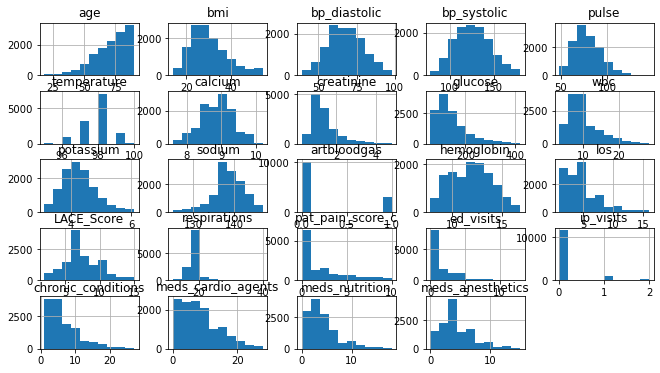

In [32]:
import dexplot as dxp
viz_featu =df1[['age', 'bmi','bp_diastolic','bp_systolic','pulse','temperature','calcium', 'creatinine', 'glucose', 'wbc','potassium', 'sodium', 'artbloodgas', 'hemoglobin','los', 'LACE_Score',
                'respirations', 'pat_pain_score_c','ed_visits', 'ip_visits', 'chronic_conditions', 'meds_cardio_agents','meds_nutrition','meds_anesthetics']]
viz = viz_featu
viz.hist(figsize=(11,6))
plt.show()

In [33]:
from pandas import DataFrame
lab_results=DataFrame(df1,columns=['glucose','creatinine','calcium','wbc','sodium'])
lab_results

,glucose,creatinine,calcium,wbc,sodium
0,106.0,0.76,8.5,21.739946,130.0
1,138.0,1.35,9.4,4.000000,138.0
2,92.0,0.90,8.3,7.800000,141.0
3,170.0,0.97,8.3,6.870000,139.0
4,151.0,1.72,8.9,5.200000,137.0
...,...,...,...,...,...
12975,106.0,0.76,8.6,4.300000,143.0
12976,225.0,1.00,8.8,7.500000,139.0
12977,95.0,0.64,9.1,8.200000,140.0
12978,95.0,1.42,9.4,16.870000,146.0


There is a direct correlation between age and patient's readmission condition.

,count,mean,std,min,25%,50%,75%,max
Condition,,,,,,,,
Heart_Failure,6774.0,73.710876,12.237808,22.649446,66.073922,76.321697,83.780971,89.998631
Pneumonia,6206.0,69.331460,15.101094,18.116358,60.142529,72.193018,81.676933,89.998631


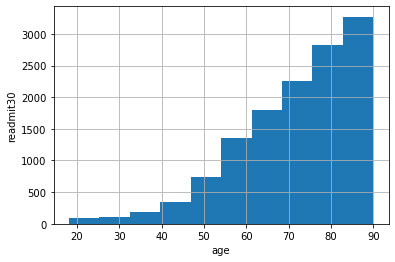

In [34]:
df.age.hist()
plt.xlabel('age')
plt.ylabel('readmit30')
df.groupby(['Condition'])['age'].describe()

Dementia seems to affect patients especialy pnuemonia readmit

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


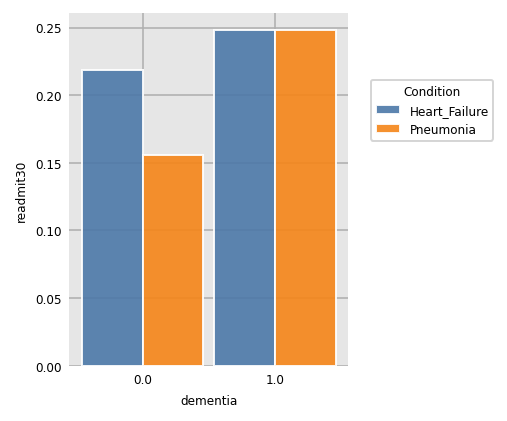

In [35]:
# Dementia on readmission 
dxp.bar(y='readmit30', x= 'dementia', data=df, aggfunc='mean',split = 'Condition',figsize=(2.5,3))

 Diabetes may increase patients readmission condition

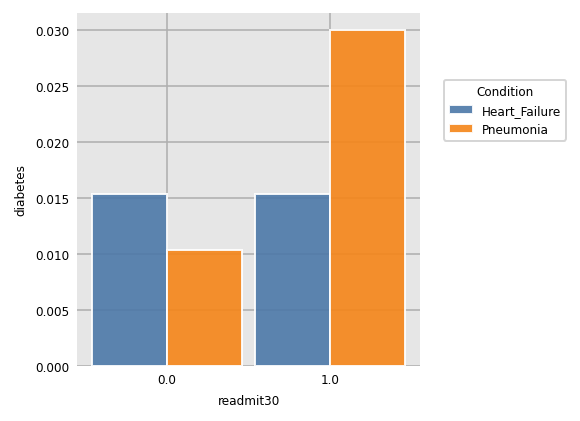

In [36]:
#dexplot shows diabetes and readamission
dxp.bar(x='readmit30', y='diabetes', data=df, aggfunc='mean', split = 'Condition',figsize=(3,3)) #glucose

 Readmitted patients had more blood gas test than non readmitted patients

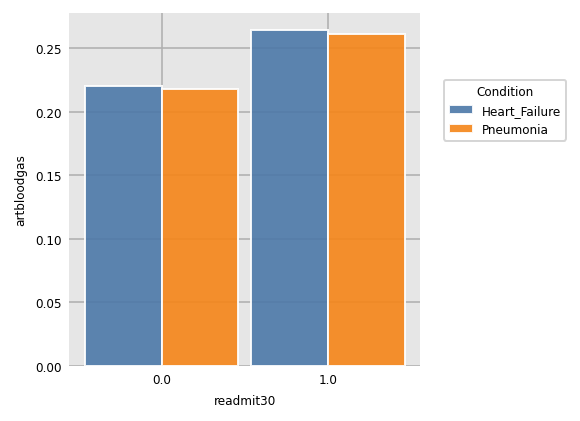

In [37]:
#dexplot shows blood gas test at readmit
dxp.bar(x='readmit30', y='artbloodgas', data=df, aggfunc='mean', split = 'Condition',figsize=(3,3))


 Readmitted patients tend to stay longer in a hospital than non readmitted patients

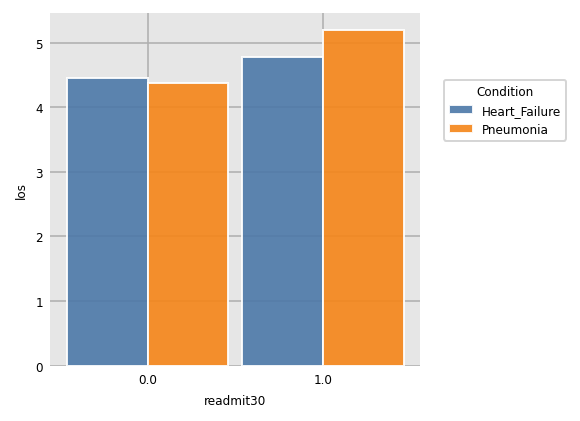

In [38]:
#dexplot shows length of stay may increase with readmission
dxp.bar(x='readmit30', y='los', data=df, aggfunc='mean', split = 'Condition',figsize=(3,3))

patient pain score increases on readmission

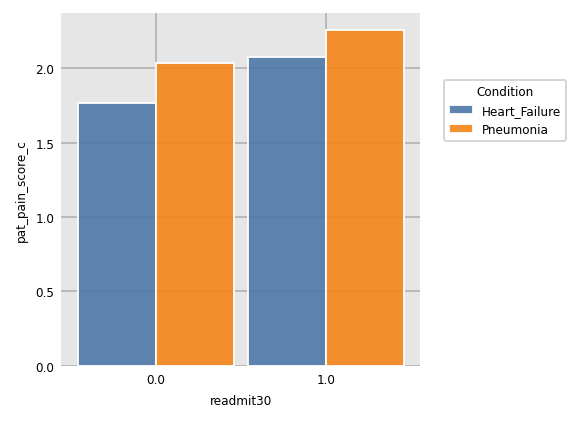

In [39]:
#dexplot shows patient pain score
dxp.bar(x='readmit30', y='pat_pain_score_c', data=df, aggfunc='mean', split = 'Condition',figsize=(3,3))

Patient pain score may be higher on readmit

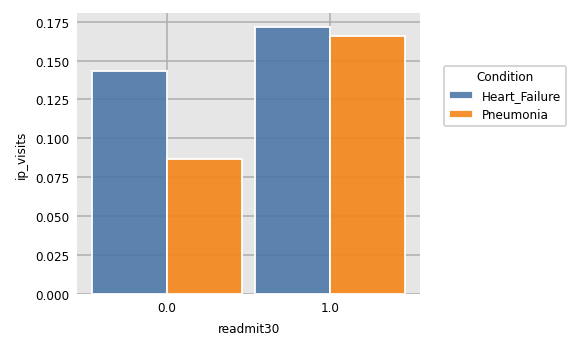

In [40]:
#dexplot shows patient pain score on readmission
dxp.bar(x='readmit30', y='ip_visits', data=df, aggfunc='mean', split = 'Condition',figsize=(3,2.5))

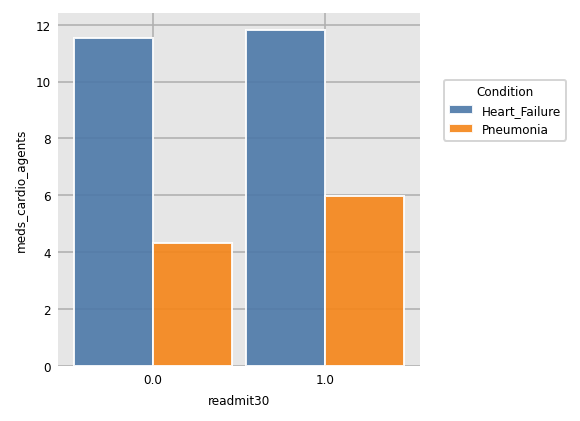

In [41]:
#patient meds_cardio_agents on readmission
dxp.bar(x='readmit30', y='meds_cardio_agents', data=df, aggfunc='mean', split = 'Condition',figsize=(3,3))

Nutrition medication adminstered to patient may increase during readmit

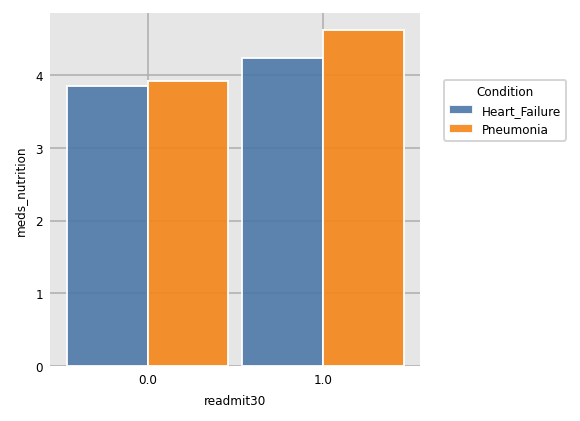

In [42]:
#patient meds_nutrition on readmission
dxp.bar(x='readmit30', y='meds_nutrition', data=df, aggfunc='mean', split = 'Condition',figsize=(3,3))

The month of June appears to the peak season for both conditions

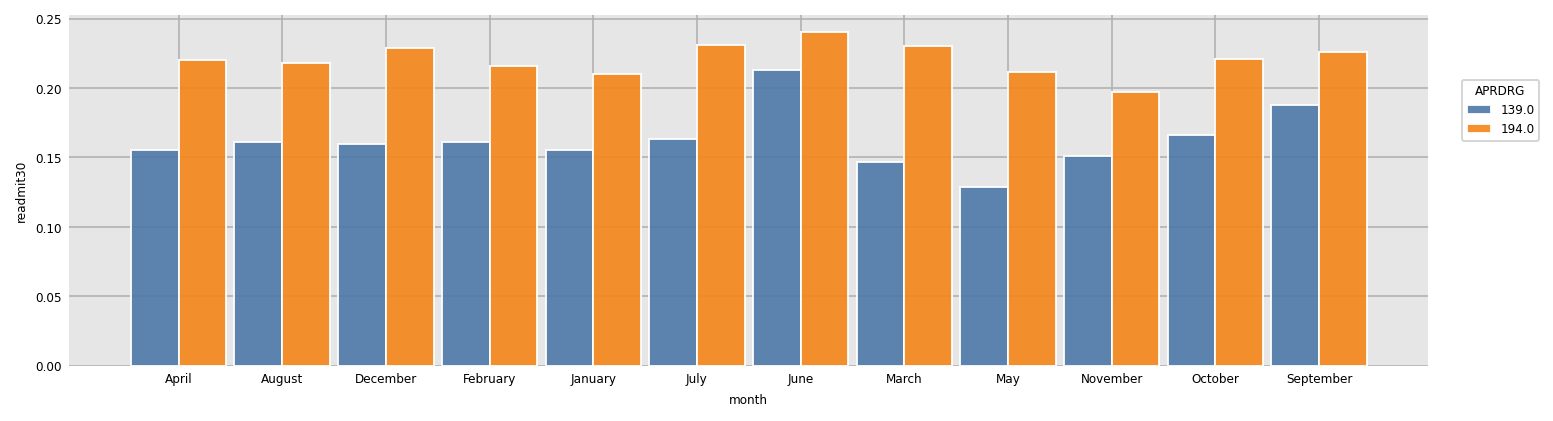

In [43]:
# dexplot shows month on readmission
df.groupby(['month', 'APRDRG'])['readmit30'].mean()*100
dxp.bar(x='month', y= 'readmit30', data=df, orientation='v', split = 'APRDRG', aggfunc='mean',figsize=(10,3))

The plot shows that tobacco may increase patients readmit condition

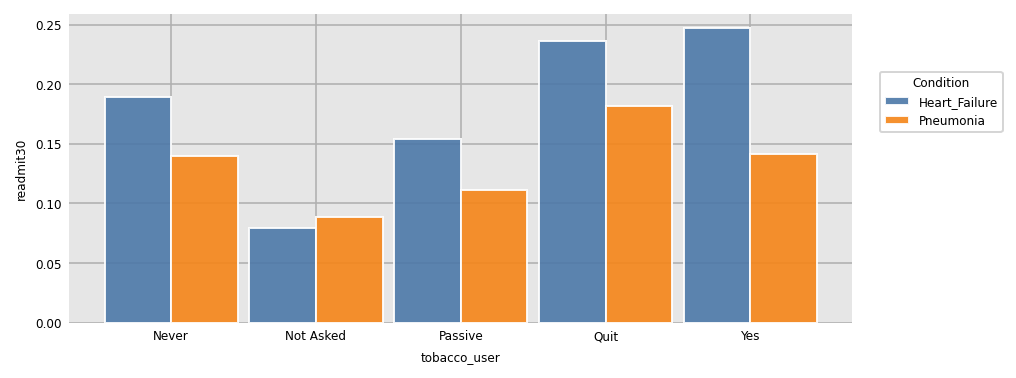

In [44]:
# dexplot shows tobacco_user on readmission
dxp.bar(y='readmit30', x='tobacco_user', data=df, aggfunc='mean',split = 'Condition', figsize=(6,2.7))
#care_plan_costs,cost_of_initial_stay,cost_of_readmission

The plot shows tabacco usage increases cost of readmission

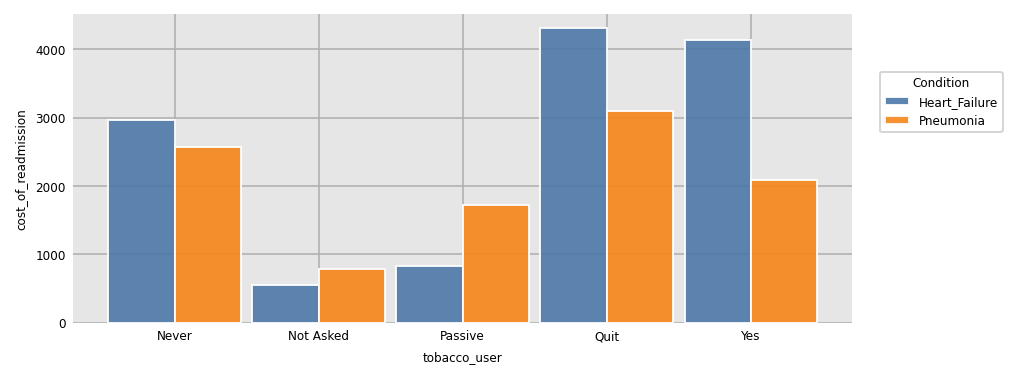

In [45]:
# dexplot shows tabacco userson on cost_of_readmission
dxp.bar(x='tobacco_user', y='cost_of_readmission', data=df, aggfunc='mean',split = 'Condition', figsize=(6,2.7))

Length of hospital stay increases the cost of initial stay 

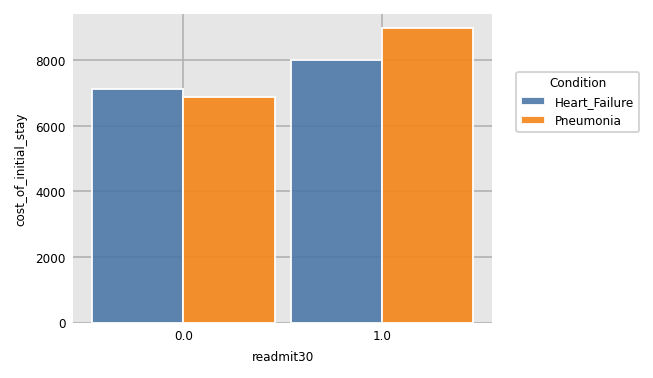

In [46]:
# dexplot shows cost_of_initial_stay on readmission
#display(df1.groupby(['readmit30'])['cost_of_initial_stay'].describe())
dxp.bar(x='readmit30', y= 'cost_of_initial_stay', data=df, aggfunc='mean',split = 'Condition',figsize=(3.5,2.7))#

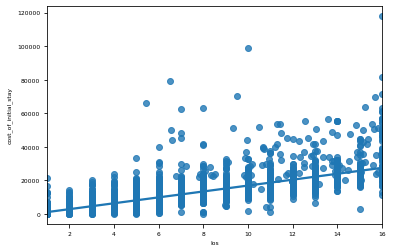

In [47]:
# cost_of_initial_stay on readmission
ax=sns.regplot(x='los',y='cost_of_initial_stay',data=df)

Number of chronics conditions may increase patietns readmit condition.

count      mean       std  min  25%  50%   75%   max
readmit30 Condition                                                           
0.0       Heart_Failure  5278.0  7.202349  5.023460  1.0  4.0  6.0  10.0  27.0
          Pneumonia      5205.0  5.561960  4.253706  1.0  2.0  5.0   7.0  26.0
1.0       Heart_Failure  1496.0  8.104278  5.401210  1.0  4.0  7.0  11.0  27.0
          Pneumonia      1001.0  6.734266  4.864084  1.0  3.0  6.0   9.0  26.0

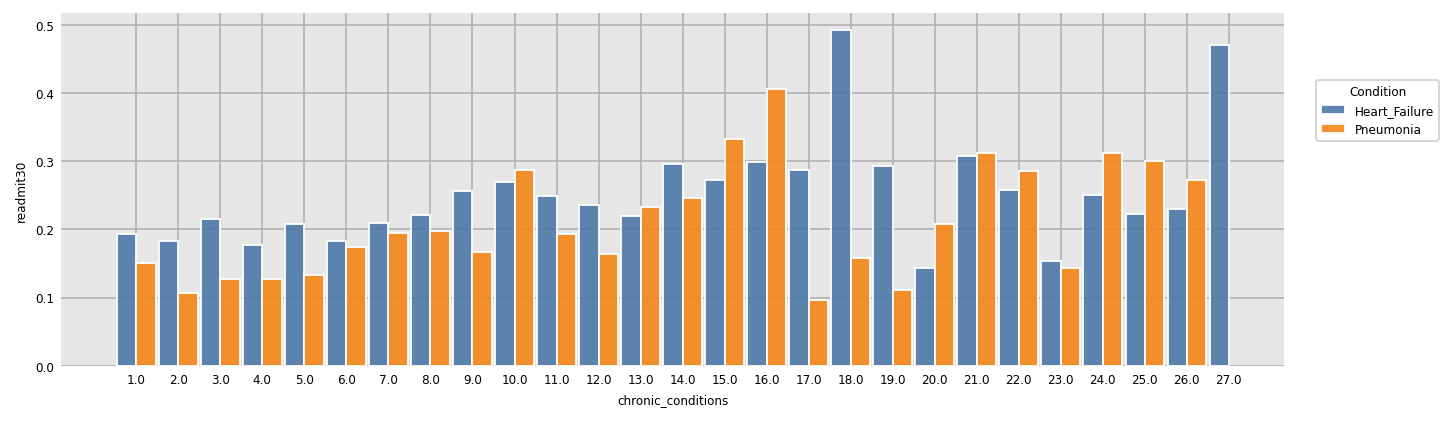

In [48]:
display(df.groupby(['readmit30', 'Condition'])['chronic_conditions'].describe())
dxp.bar(y='readmit30', x='chronic_conditions', data=df, aggfunc='mean', split = 'Condition',figsize=(9,3))

There is strong correlation between weight and bmi as expected 

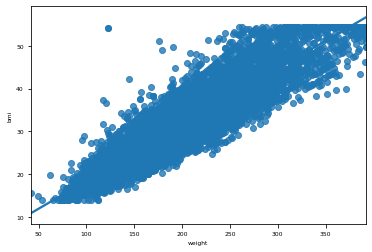

In [49]:
#based on regplot correlation between weight and bmi
ax=sns.regplot(x='weight',y='bmi',data=df)

<AxesSubplot:xlabel='LACE_Score', ylabel='los'>

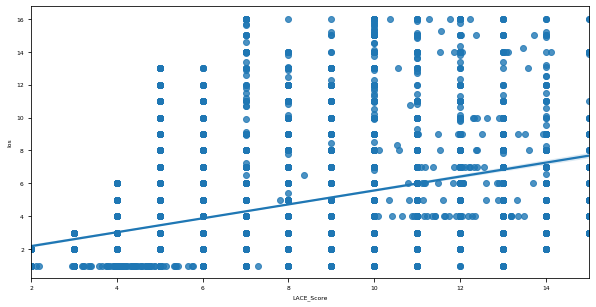

In [50]:
# Regplot shows Lace_score has significant impact on readmit with conditions
plt.figure(figsize=(10, 5))
sns.regplot(y='los',x='LACE_Score',data=df1)

Patients who visited emergcy departments in prior 12 months have higher probablity of readmit

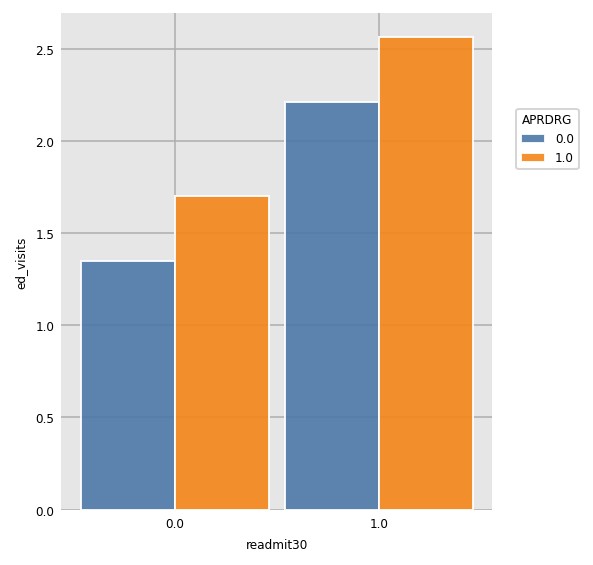

In [51]:
#df.groupby(['readmit30','Condition'])['ed_visits'].describe()
display(dxp.bar(x='readmit30', y='ed_visits', data=df1, aggfunc='mean',split = 'APRDRG', figsize=(3.5,4)))

Care_plan_cost of readmitted patients is higher than non-readmit patients

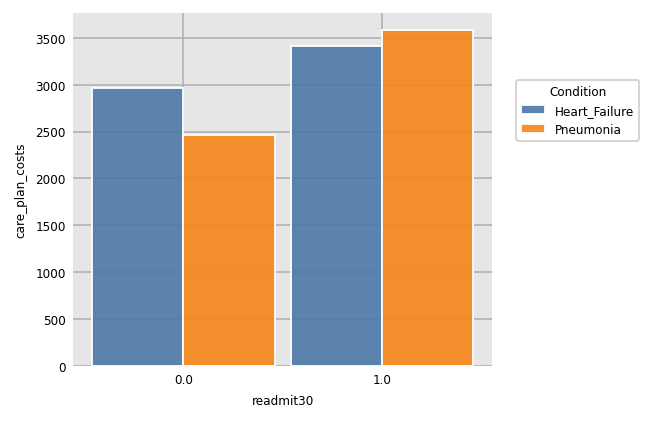

In [52]:
# dexplot shows care_plan_costs on readmit
#display(df.groupby(['readmit30','Condition'])['care_plan_costs'].describe())
dxp.bar(x='readmit30', y='care_plan_costs', data=df, aggfunc='mean',split = 'Condition', figsize=(3.5,3))

Skilled Nursing Facility care plan is more expensive than the rest

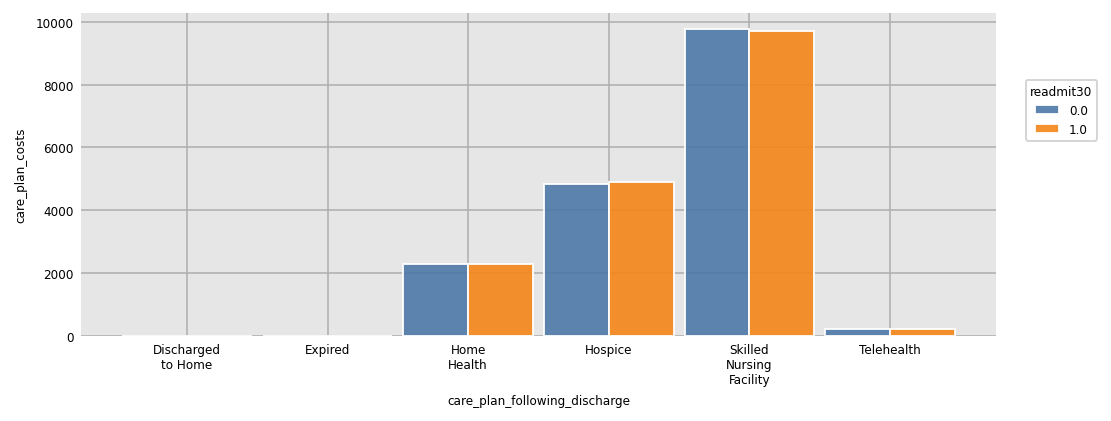

In [53]:
# dexplot shows care_plan_following_discharge on readmit
dxp.bar(y='care_plan_costs', x= 'care_plan_following_discharge', data=df, orientation='v', split = 'readmit30', aggfunc='mean',figsize=(7,3))

Care plan following discharge has significant impact on readmit

In [54]:
filtt = df['readmit30'] ==1
readmit_cost=df.loc[filtt]['cost_of_readmission'].agg(['mean'])
initial_stay=df.loc[filtt]['cost_of_initial_stay'].agg(['mean'])
plan_cost=df1.loc[filtt]['care_plan_costs'].agg(['mean'])

print('care_plan_costs\n',plan_cost)
print('\ncost_of_initial_stay\n',initial_stay)
print('\ncost_of_readmission\n',readmit_cost)

care_plan_costs
 mean    3483.156988
Name: care_plan_costs, dtype: float64

cost_of_initial_stay
 mean    8389.879643
Name: cost_of_initial_stay, dtype: float64

cost_of_readmission
 mean    17102.865369
Name: cost_of_readmission, dtype: float64


<AxesSubplot:xlabel='care_plan_costs', ylabel='Condition'>

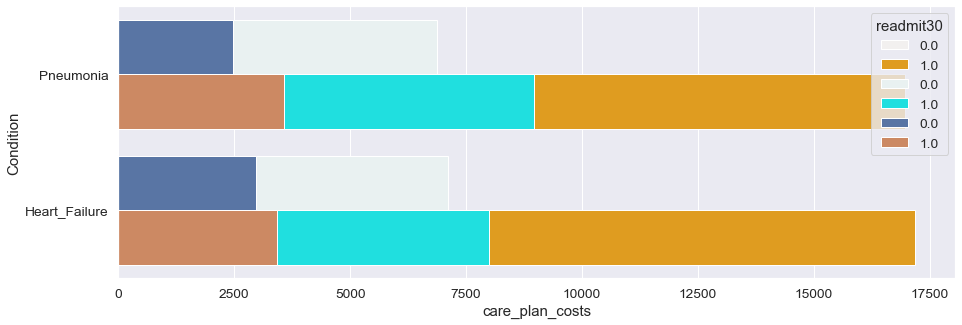

In [55]:
sns.set(font_scale = 1.25)
plt.figure(figsize=(15, 5))
sns.barplot(y='Condition', x='cost_of_readmission',hue = 'readmit30',ci = None, data=df,color = 'orange')
sns.barplot(y='Condition', x='cost_of_initial_stay',hue = 'readmit30',ci = None, data=df,color = 'cyan')
sns.barplot(y='Condition', x='care_plan_costs',hue = 'readmit30',ci = None,data=df)

It can be observed from dexplot and table below that the cost of readmission for 'Hospice' and Skilled Nursing Faclity' care plans reduced by 50% while patients who were 'Discharged to Home' and on 'Telehealth' care plan ended up paying 2,500.00 - 2,900.00 for their care.
Patients who were on 'Home Health' care plan also saw an increased 75% cost which may have been minimized with a good readmission model. Thus, care plan following discharge may save patients more money

In [56]:
# care_plan_following_discharge on cost of readmission
df.groupby(['care_plan_following_discharge'])['care_plan_costs','cost_of_readmission'].mean()

C:\Users\Kin1\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,care_plan_costs,cost_of_readmission
care_plan_following_discharge,,
Discharged to Home,0.000000,2927.191487
Expired,0.000000,0.000000
Home Health,2295.397343,4032.452808
Hospice,4853.590551,1627.245771
Skilled Nursing Facility,9768.641813,4327.329620
Telehealth,198.963000,2577.214033


There is significant difference between cost of readmission cand care_plan_costs

<AxesSubplot:xlabel='care_plan_costs', ylabel='care_plan_following_discharge'>

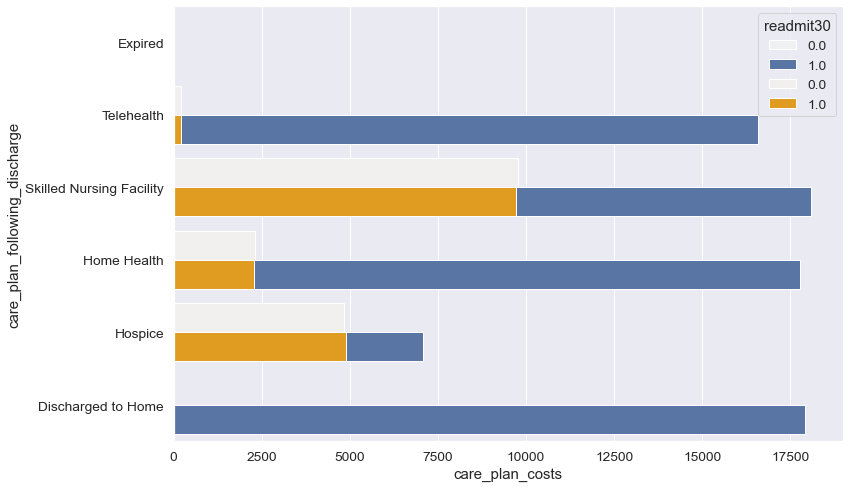

In [57]:
# barplot shows care_plan_costs on cost of readmission
sns.set(font_scale = 1.25)
plt.figure(figsize=(12, 8))
sns.barplot(y='care_plan_following_discharge', x='cost_of_readmission',hue = 'readmit30',ci = None,data=df,color='b')
sns.barplot(y='care_plan_following_discharge', x='care_plan_costs',hue = 'readmit30',ci = None,data=df,color='orange')

catplot shows impact of 'Skilled Nursing Facility' care plan on on readmit

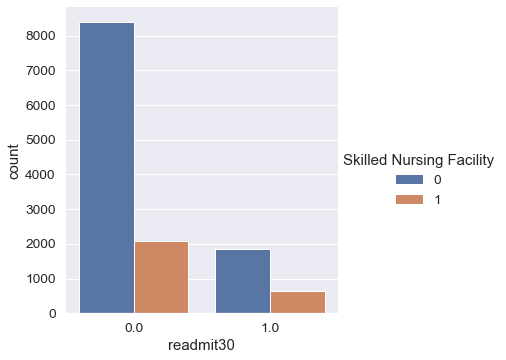

In [58]:
# plot Skilled Nursing facility care plan after discharge
sns.catplot(x='readmit30',hue='Skilled Nursing Facility',kind='count',data=df2)

<AxesSubplot:xlabel='readmit30', ylabel='count'>

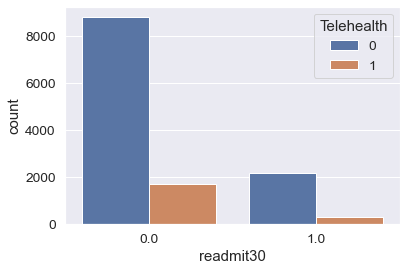

In [59]:
sns.countplot(x='readmit30',hue='Telehealth',data=df2)

'Home Health' care plan has significant impact on readmit

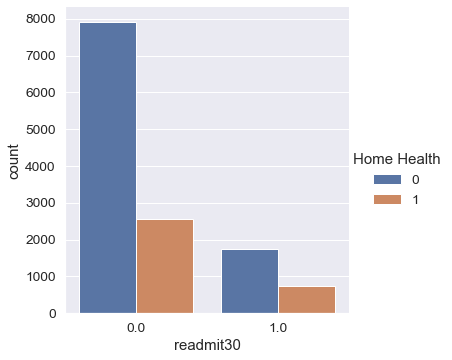

In [60]:
# Catplot shows correlation between readmit and Home Health care plan
sns.catplot(x='readmit30',hue='Home Health',kind='count',data=df2, )

In [61]:
#sns.countplot(x='readmit30',hue='Hospice',data=df1)

Care plan summary following discharge

<AxesSubplot:xlabel='readmit30', ylabel='count'>

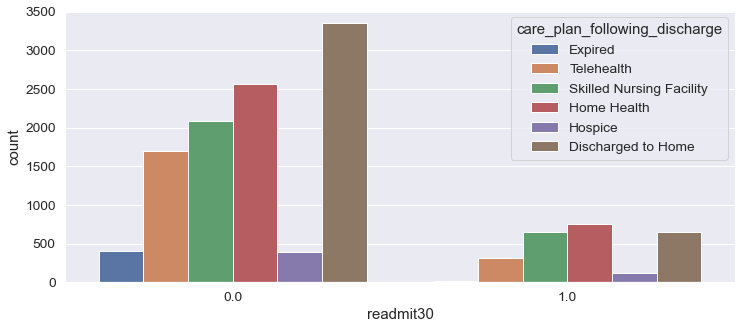

In [62]:
# Catplot shows correlation between readmit and care_plan_following_discharge
sns.set(font_scale=1.25)
plt.figure(figsize=(12,5))
sns.countplot(x='readmit30',hue='care_plan_following_discharge',data=df1)


**Heatmap**
- Pearson Correlation

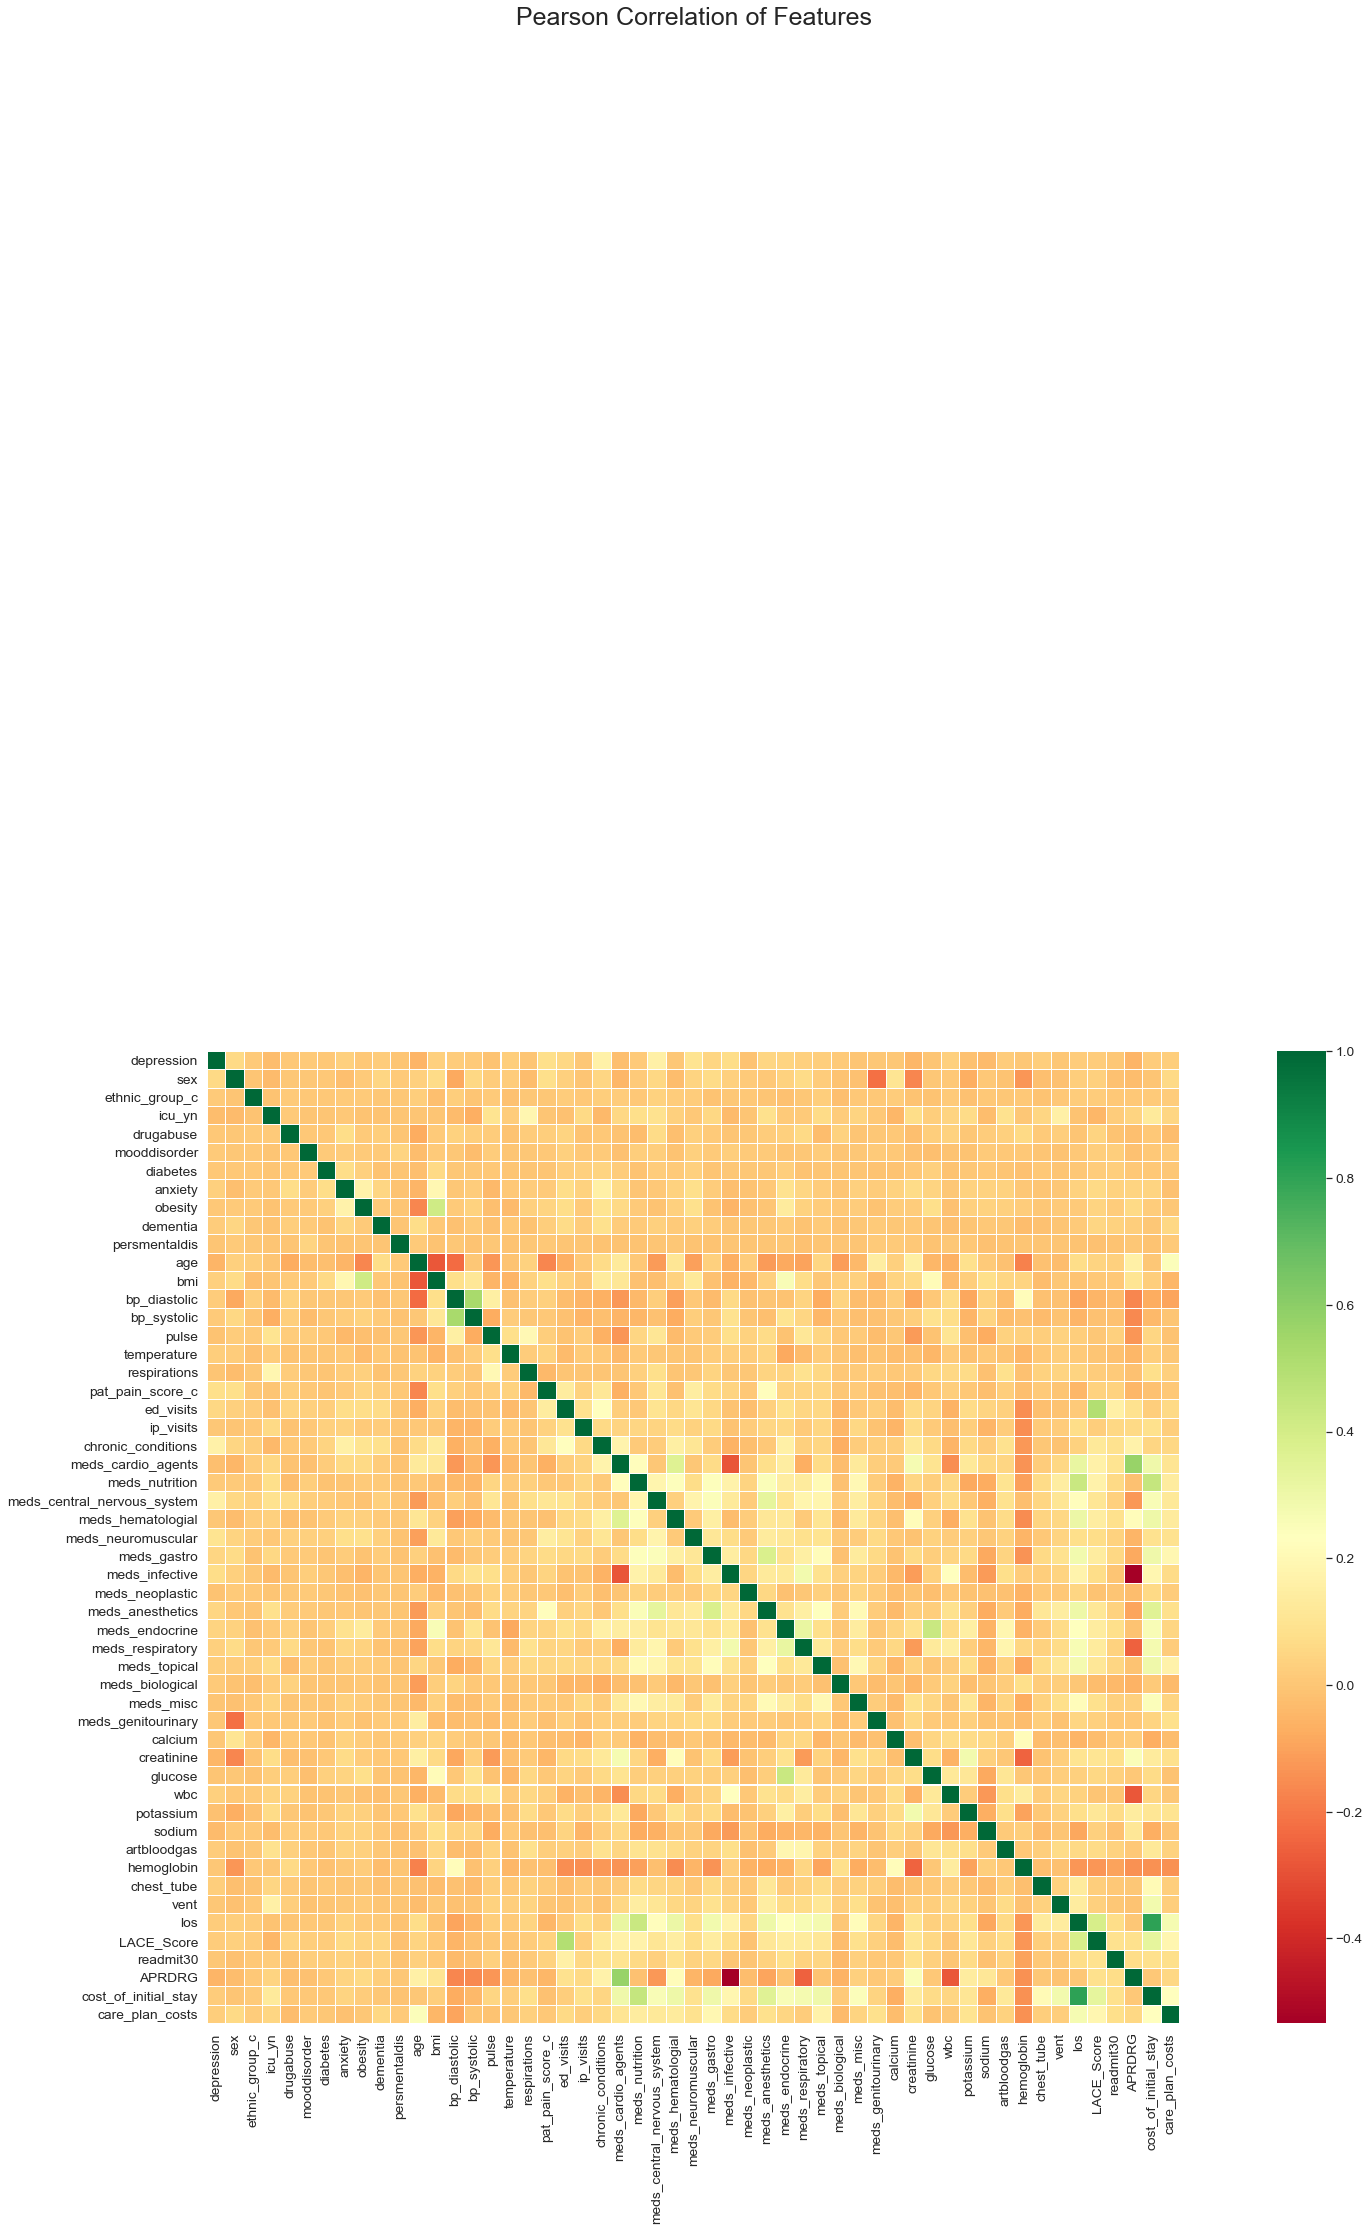

In [63]:
corr = df1.corr()
f,(ax) = plt.subplots(1, 1,figsize=(35,20))
heatmap= sns.heatmap(df1.corr(),
                     cmap="RdYlGn",square=True,
                     ax=ax,fmt='.2f',
                     #annot=True,
                     linewidth=0.05)
f.subplots_adjust(top=0.80)
plt.title('Pearson Correlation of Features',y=2.05,size=25)
top_corr_features = corr.index

In [64]:
scaler = MinMaxScaler()
features_minimax = pd.DataFrame(scaler.fit_transform(df2),columns =(df2.columns))

## split dataset

In [65]:
from sklearn.model_selection import train_test_split

display(df1.readmit30.unique())#.value_counts())
df1.shape
y = features_minimax.readmit30
X = features_minimax.drop("readmit30", axis=1)

y = df2.readmit30
X = df2.drop('readmit30', axis=1)

#cat_features = X.dtypes == object
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y,random_state=123)

scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

array([0., 1.])

In [66]:
df1.dtypes.value_counts()

float64    51
object      5
int64       2
dtype: int64

In [67]:
# calculate the percentage of ones
# simply calculate the mean = percentage of ones
y_test.mean(),df1.readmit30.mean()

(0.19221879815100154, 0.1923728813559322)

## Models Selection

In [68]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,ExtraTreesClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR,SVC

classifiers = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    HistGradientBoostingClassifier(),
    ExtraTreesClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(),
    SVC(),
    
    ]

for classifier in classifiers:
    pipe = make_pipeline(StandardScaler(), classifier)

    pipe.fit(X_train, y_train)
    cv_scores = cross_val_score(pipe, X_train, y_train, cv=3, scoring="accuracy")
    y_pred = pipe.predict(X_test)
    
    print('\n',classifier,"\nTrainng score: %.3f" % pipe.score(X_train, y_train))
    print("Testing score: %.3f" % pipe.score(X_test, y_test))
    print('Cross validation score: %.3f' % mean(cv_scores))
    print("ROC AUC Score: %.3f" % roc_auc_score(y_test, y_pred))

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    


 RandomForestClassifier() 
Trainng score: 1.000
Testing score: 0.838
Cross validation score: 0.834
ROC AUC Score: 0.579
[[2096    1]
 [ 420   79]]
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      2097
         1.0       0.99      0.16      0.27       499

    accuracy                           0.84      2596
   macro avg       0.91      0.58      0.59      2596
weighted avg       0.86      0.84      0.79      2596


 GradientBoostingClassifier() 
Trainng score: 0.824
Testing score: 0.810
Cross validation score: 0.810
ROC AUC Score: 0.512
[[2090    7]
 [ 485   14]]
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89      2097
         1.0       0.67      0.03      0.05       499

    accuracy                           0.81      2596
   macro avg       0.74      0.51      0.47      2596
weighted avg       0.78      0.81      0.73      2596


 HistGradientBoostingClassifier() 
Trainng sc

## RandomForestClassifier




In [69]:
from sklearn.ensemble import RandomForestClassifier
randf_clf = RandomForestClassifier()

#cross validation 
scores = cross_val_score(randf_clf, X_train, y_train, cv=5, scoring="accuracy")

# fit model
clf_rf = randf_clf.fit(X_train, y_train)

# Predict model
y_pred = randf_clf.predict(X_test)

# Use score method to get accuracy of model
print("Training score: %.3f" % randf_clf.score(X_train, y_train))   
print("Testing score: %.3f" % randf_clf.score(X_test, y_test))
print("Cross validation score: %.3f" % mean(scores))
print("ROC AUC Score: %.3f" % roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training score: 1.000
Testing score: 0.837
Cross validation score: 0.836
ROC AUC Score: 0.578
[[2096    1]
 [ 421   78]]
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      2097
         1.0       0.99      0.16      0.27       499

    accuracy                           0.84      2596
   macro avg       0.91      0.58      0.59      2596
weighted avg       0.86      0.84      0.79      2596



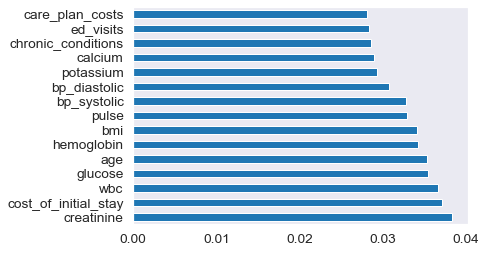

In [70]:
#plot graph of inbuilt class feature importances for better visualization
randf_clf.feature_importances_
feat_importances = pd.Series(clf_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

### Tunning RandomForestClassifier


In [71]:
## Tunning RandomForestClassifier

randf_clf = RandomForestClassifier(criterion='gini', max_features=None,min_samples_split = 4,
                        min_samples_leaf=7, n_estimators=18, n_jobs=1,random_state=3, verbose=False)
#make pipeline
pipe_rf = make_pipeline(StandardScaler(), randf_clf)

#cross validation 
scores = cross_val_score(pipe_rf, X_train, y_train, cv=5, scoring="accuracy")

# fit model
clf_rf = pipe_rf.fit(X_train, y_train)

# Predict model
y_pred = pipe_rf.predict(X_test)

# Use score method to get accuracy of model
print("Training score: %.3f" % pipe_rf.score(X_train, y_train))   
print("Testing score: %.3f" % pipe_rf.score(X_test, y_test))
print("Cross validation score: %.3f" % mean(scores))
print("ROC AUC Score: %.3f" % roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training score: 0.886
Testing score: 0.831
Cross validation score: 0.826
ROC AUC Score: 0.568
[[2085   12]
 [ 428   71]]
              precision    recall  f1-score   support

         0.0       0.83      0.99      0.90      2097
         1.0       0.86      0.14      0.24       499

    accuracy                           0.83      2596
   macro avg       0.84      0.57      0.57      2596
weighted avg       0.83      0.83      0.78      2596



## GradientBoostingClassifier

Training score: 0.824
Testing score: 0.811
Cross validation score: 0.812
ROC AUC Score: 0.513
[[2091    6]
 [ 485   14]]
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89      2097
         1.0       0.70      0.03      0.05       499

    accuracy                           0.81      2596
   macro avg       0.76      0.51      0.47      2596
weighted avg       0.79      0.81      0.73      2596


Is this model predicting on [0],[1] or [0,1]?  [0. 1.]


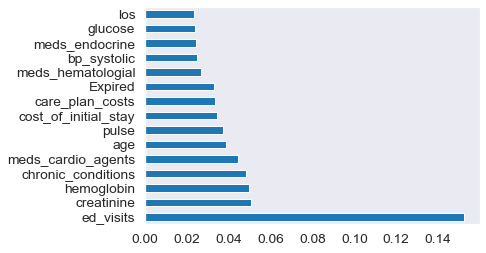

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

gdb_clf =GradientBoostingClassifier()

# fit model
clf_rf = gdb_clf.fit(X_train, y_train)
scores = cross_val_score(gdb_clf, X_train, y_train, cv=5, scoring="accuracy")

# Predict model
y_pred = gdb_clf.predict(X_test)

print("Training score: %.3f" % gdb_clf.score(X_train, y_train))   
print("Testing score: %.3f" % gdb_clf.score(X_test, y_test))
print("Cross validation score: %.3f" % mean(scores))
print("ROC AUC Score: %.3f" % roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\nIs this model predicting on [0],[1] or [0,1]? ', np.unique(y_pred))

#plot graph of inbuilt class feature importances for better visualization
gdb_clf.feature_importances_
feat_importances = pd.Series(gdb_clf.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

### Tuning GradientBoostingClassifier

In [73]:
clf_gdb = GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,
                                     subsample=.75,max_depth=6,random_state=3)
# gdb = GradientBoostingClassifier(max_features=0.4,min_samples_leaf=4, min_samples_split=11, n_estimators=100)


pipe_gdb = make_pipeline(StandardScaler(), clf_gdb)

# fit model
clf_rf = pipe_gdb.fit(X_train, y_train)
scores = cross_val_score(pipe_gdb, X_train, y_train, cv=5, scoring="accuracy")

# Predict model
y_pred = pipe_gdb.predict(X_test)

# Use score method to get accuracy of model
print("Training score: %.3f" % pipe_gdb.score(X_train, y_train))   
print("Testing score: %.3f" % pipe_gdb.score(X_test, y_test))
print("Cross validation score: %.3f" % mean(scores))
print("ROC AUC Score: %.3f" % roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('\nIs this model predicting on [0],[1] or [0,1]? ', np.unique(y_pred))


Training score: 0.861
Testing score: 0.823
Cross validation score: 0.820
ROC AUC Score: 0.549
[[2085   12]
 [ 447   52]]
              precision    recall  f1-score   support

         0.0       0.82      0.99      0.90      2097
         1.0       0.81      0.10      0.18       499

    accuracy                           0.82      2596
   macro avg       0.82      0.55      0.54      2596
weighted avg       0.82      0.82      0.76      2596


Is this model predicting on [0],[1] or [0,1]?  [0. 1.]


## HistGradientBoostingClassifier

In [74]:
from sklearn.ensemble import HistGradientBoostingClassifier

hist_clf = HistGradientBoostingClassifier()

#cross validation 
scores = cross_val_score(hist_clf, X_train, y_train, cv=5, scoring="accuracy")

# fit model
clf_rf = hist_clf.fit(X_train, y_train)

# Predict model
y_pred = hist_clf.predict(X_test)

# Use score method to get accuracy of model
print("Training score: %.3f" % hist_clf.score(X_train, y_train))   
print("Testing score: %.3f" % hist_clf.score(X_test, y_test))
print("Cross validation score: %.3f" % mean(scores))
print("ROC AUC Score: %.3f" % roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training score: 0.859
Testing score: 0.820
Cross validation score: 0.825
ROC AUC Score: 0.546
[[2079   18]
 [ 449   50]]
              precision    recall  f1-score   support

         0.0       0.82      0.99      0.90      2097
         1.0       0.74      0.10      0.18       499

    accuracy                           0.82      2596
   macro avg       0.78      0.55      0.54      2596
weighted avg       0.81      0.82      0.76      2596



### Tunning HistGradientBoostingClassifier

In [75]:
### Tunning
clf_hist = HistGradientBoostingClassifier(learning_rate=0.1,max_depth=8,random_state=3)

#make pipeline
pipe_hist = make_pipeline(StandardScaler(), clf_hist)

#cross validation 
scores = cross_val_score(pipe_hist, X_train, y_train, cv=5, scoring="accuracy")

# fit model
clf_rf_fit = pipe_hist.fit(X_train, y_train)

# Predict model
y_pred = pipe_hist.predict(X_test)

# Use score method to get accuracy of model
print("Training score: %.3f" % pipe_hist.score(X_train, y_train))   
print("Testing score: %.3f" % pipe_hist.score(X_test, y_test))
print("Cross validation score: %.3f" % mean(scores))
print("ROC AUC Score: %.3f" % roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training score: 0.857
Testing score: 0.825
Cross validation score: 0.824
ROC AUC Score: 0.554
[[2084   13]
 [ 442   57]]
              precision    recall  f1-score   support

         0.0       0.83      0.99      0.90      2097
         1.0       0.81      0.11      0.20       499

    accuracy                           0.82      2596
   macro avg       0.82      0.55      0.55      2596
weighted avg       0.82      0.82      0.77      2596



## ExtraTreesClassifier

In [76]:
from sklearn.ensemble import ExtraTreesClassifier

xtr_clf = ExtraTreesClassifier()

#cross validation 
scores = cross_val_score(xtr_clf, X_train, y_train, cv=5, scoring="accuracy")

# fit model
clf_xtr = xtr_clf.fit(X_train, y_train)

# Predict model
y_pred = xtr_clf.predict(X_test)

# Use score method to get accuracy of model
print("Training score: %.3f" % xtr_clf.score(X_train, y_train))   
print("Testing score: %.3f" % xtr_clf.score(X_test, y_test))
print("Cross validation score: %.3f" % mean(scores))
print("ROC AUC Score: %.3f" % roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training score: 1.000
Testing score: 0.837
Cross validation score: 0.836
ROC AUC Score: 0.577
[[2094    3]
 [ 421   78]]
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      2097
         1.0       0.96      0.16      0.27       499

    accuracy                           0.84      2596
   macro avg       0.90      0.58      0.59      2596
weighted avg       0.86      0.84      0.79      2596



### Tunning ExtraTreesClassifier

In [77]:
## Tunning
clf_xtr= ExtraTreesClassifier(max_features=0.45, min_samples_leaf=7,min_samples_split=12)
clf_xtr1= ExtraTreesClassifier(bootstrap=True, max_features=0.7472105238637603,
                         n_estimators=264, n_jobs=1, random_state=0, verbose=False)
clf_xtr2 = ExtraTreesClassifier(criterion='gini', max_features=0.17984040275895374,
                     min_samples_leaf=4, n_estimators=85, n_jobs=1,random_state=0, verbose=False)

# make pipe
pipe_xrt = make_pipeline(StandardScaler(), clf_xtr1)#2

# cross validation
scores = cross_val_score(pipe_xrt, X_train, y_train, cv=5, scoring="accuracy")


# fit model
clf_xtr_1 = pipe_xrt.fit(X_train, y_train)

# Predict model
y_pred = pipe_xrt.predict(X_test)

# Use score method to get accuracy of model
print("Training score: %.3f" % pipe_xrt.score(X_train, y_train))   
print("Testing score: %.3f" % pipe_xrt.score(X_test, y_test))
print("Cross validation score: %.3f" % mean(scores))
print("ROC AUC Score: %.3f" % roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training score: 1.000
Testing score: 0.837
Cross validation score: 0.836
ROC AUC Score: 0.579
[[2095    2]
 [ 420   79]]
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      2097
         1.0       0.98      0.16      0.27       499

    accuracy                           0.84      2596
   macro avg       0.90      0.58      0.59      2596
weighted avg       0.86      0.84      0.79      2596



## KNeighborsClassifier

In [78]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

#cross validation
scores = cross_val_score(knn_clf, X_train, y_train, cv=5, scoring="accuracy")

# fit model
clf_rf = knn_clf.fit(X_train, y_train)

# Predict model
y_pred = knn_clf.predict(X_test)

# Use score method to get accuracy of model
print("Training score: %.3f" % knn_clf.score(X_train, y_train))   
print("Testing score: %.3f" % knn_clf.score(X_test, y_test))
print("Cross validation score: %.3f" % mean(scores))
print("ROC AUC Score: %.3f" % roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training score: 0.840
Testing score: 0.792
Cross validation score: 0.797
ROC AUC Score: 0.555
[[1970  127]
 [ 414   85]]
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88      2097
         1.0       0.40      0.17      0.24       499

    accuracy                           0.79      2596
   macro avg       0.61      0.55      0.56      2596
weighted avg       0.74      0.79      0.76      2596



### Tunning KNeighborsClassifier

In [79]:
## Tunning
#clf_knn = KNeighborsClassifier(n_neighbors=55, p=1, weights='distance')
clf_knn= KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=1, n_neighbors=24, p=2,
                     weights='distance')
#make pipeline
pipe_knn = make_pipeline(StandardScaler(), clf_knn)

# fit model
clf_rf = pipe_knn.fit(X_train, y_train)
scores = cross_val_score(pipe_knn, X_train, y_train, cv=5, scoring="accuracy")

# Predict model
y_pred = pipe_knn.predict(X_test)

# Use score method to get accuracy of model
print("Training score: %.3f" % pipe_knn.score(X_train, y_train))   
print("Testing score: %.3f" % pipe_knn.score(X_test, y_test))
print("Cross validation score: %.3f" % mean(scores))
print("ROC AUC Score: %.3f" % roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training score: 1.000
Testing score: 0.832
Cross validation score: 0.833
ROC AUC Score: 0.575
[[2083   14]
 [ 421   78]]
              precision    recall  f1-score   support

         0.0       0.83      0.99      0.91      2097
         1.0       0.85      0.16      0.26       499

    accuracy                           0.83      2596
   macro avg       0.84      0.57      0.58      2596
weighted avg       0.83      0.83      0.78      2596



## Support Vector machine

In [80]:
from sklearn import svm
svc_clf = svm.SVC()

# cross validation
scores = cross_val_score(svc_clf, X_train, y_train, cv=5, scoring="accuracy")

# fit model
svc_clf.fit(X_train, y_train)

# Predict model
y_pred = svc_clf.predict(X_test)

# Use score method to get accuracy of model
print("Training score: %.3f" % svc_clf.score(X_train, y_train))   
print("Testing score: %.3f" % svc_clf.score(X_test, y_test))
print("Cross validation score: %.3f" % mean(scores))
print("ROC AUC Score: %.3f" % roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training score: 0.840
Testing score: 0.820
Cross validation score: 0.821
ROC AUC Score: 0.533
[[2096    1]
 [ 466   33]]
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90      2097
         1.0       0.97      0.07      0.12       499

    accuracy                           0.82      2596
   macro avg       0.89      0.53      0.51      2596
weighted avg       0.85      0.82      0.75      2596



### Tunning Support Vector machine

In [81]:
## Tunning
clf_svc = SVC(C=78628.91306010487, cache_size=512, class_weight=None, degree=1,gamma=0.44909476152905226, 
              kernel='rbf', max_iter=430087067.0, random_state=1, shrinking=False,tol=0.0007841109378165444)

#make pipeline
pipe_svc = make_pipeline(StandardScaler(), clf_svc)

#cross validation
scores = cross_val_score(pipe_svc, X_train, y_train, cv=5, scoring="accuracy")

# fit model
clf_rf = pipe_svc.fit(X_train, y_train)

# Predict model
y_pred = pipe_svc.predict(X_test)

# Use score method to get accuracy of model
print("Training score: %.3f" % pipe_svc.score(X_train, y_train))   
print("Testing score: %.3f" % pipe_svc.score(X_test, y_test))
print("Cross validation score: %.3f" % mean(scores))
print("ROC AUC Score: %.3f" % roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Training score: 1.000
Testing score: 0.836
Cross validation score: 0.836
ROC AUC Score: 0.574
[[2097    0]
 [ 425   74]]
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      2097
         1.0       1.00      0.15      0.26       499

    accuracy                           0.84      2596
   macro avg       0.92      0.57      0.58      2596
weighted avg       0.86      0.84      0.78      2596



## RandomizedSearchCV
**RandomForestClassifier**

In [82]:
#hyper parameters
params_rf = {
    'randomforestclassifier__min_samples_split': [2,3,4],
    'randomforestclassifier__min_samples_leaf': [1,2,3],
    'randomforestclassifier__max_features': ['log2', 'sqrt','auto'],
}
#make pipeline
pipe_rf = make_pipeline(StandardScaler(),RandomForestClassifier())

#cross validation
cores = cross_val_score(pipe_rf, X_train, y_train, cv=5)

#Grid Search Cross Validation
CV = RandomizedSearchCV(pipe_rf, param_distributions=params_rf, cv=5)

#fit
CV.fit(X_train, y_train)

#predict
y_pred_pipe = CV.predict(X_test)

CV_score = accuracy_score(y_test,y_pred_pipe)
print("Training score: %.3f" % CV.score(X_train, y_train))  
print("Testing score: %.3f" % CV.score(X_test, y_test))
print("Cross validation score: %.3f" % mean(scores))
print("best score: %.3f" % CV.best_score_)
print('\n best_parameters\n',CV.best_params_)
print('\nIs this model predicting on [0],[1] or [0,1]? ', np.unique(y_pred_pipe))

Training score: 1.000
Testing score: 0.837
Cross validation score: 0.836
best score: 0.836

 best_parameters
 {'randomforestclassifier__min_samples_split': 3, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_features': 'log2'}

Is this model predicting on [0],[1] or [0,1]?  [0. 1.]


**ExtraTreesClassifier**

In [83]:
from sklearn.ensemble import ExtraTreesClassifier
params_xtr ={
    'extratreesclassifier__n_estimators': range(50,126,25),
    'extratreesclassifier__max_features': range(20,50),
    'extratreesclassifier__min_samples_leaf': range(20,50,5),
    'extratreesclassifier__min_samples_split': range(15,36,5),
}
#make pipeline
pipe_xtr = make_pipeline(StandardScaler(), ExtraTreesClassifier())

#Grid Search Cross Validation
rscv_grid = RandomizedSearchCV(pipe_xtr, param_distributions=params_xtr, cv=5)

#fit
rscv_grid.fit(X_train, y_train)

#predict
y_pred_pipe = rscv_grid.predict(X_test)

CV_score = accuracy_score(y_test,y_pred_pipe)
print("Training score: %.3f" % rscv_grid.score(X_train, y_train))  
print("Testing score: %.3f" % rscv_grid.score(X_test, y_test))
#print("Cross validation score: %.3f" % mean(scores))
print("best score: %.3f" % rscv_grid.best_score_)
print('\n best_parameters\n',rscv_grid.best_params_)
print('\nIs this model predicting on [0],[1] or [0,1]? ', np.unique(y_pred_pipe))

Training score: 0.818
Testing score: 0.811
best score: 0.812

 best_parameters
 {'extratreesclassifier__n_estimators': 125, 'extratreesclassifier__min_samples_split': 30, 'extratreesclassifier__min_samples_leaf': 20, 'extratreesclassifier__max_features': 33}

Is this model predicting on [0],[1] or [0,1]?  [0. 1.]


**Decisiontreeclassifier**

In [84]:
from sklearn.tree import DecisionTreeClassifier
#hyper parameters
params_dt =  {
    'decisiontreeclassifier__min_samples_split':[9,10,15],
    'decisiontreeclassifier__min_samples_leaf': [2,4,8,10],
    'decisiontreeclassifier__max_depth': [5,15,20]
}
#make pipe
pipe_dt = make_pipeline(StandardScaler(), DecisionTreeClassifier())

#Grid Search Cross Validation
dt_rscv_grid = RandomizedSearchCV(pipe_dt, param_distributions=params_dt, cv=5)

#fit
dt_rscv_grid.fit(X_train, y_train)

#predict
y_pred_pipe = dt_rscv_grid.predict(X_test)

CV_score = accuracy_score(y_test,y_pred_pipe)
print("Training score: %.3f" % dt_rscv_grid.score(X_train, y_train))  
print("Testing score: %.3f" % dt_rscv_grid.score(X_test, y_test))
print("accuracy score: %.3f" % CV_score)
print("Cross validation score: %.3f" % mean(scores))
print("best cross-validation accuracy: %.3f" % dt_rscv_grid.best_score_)
print('\n best_parameters\n',dt_rscv_grid.best_params_)
print('\nIs this model predicting on [0],[1] or [0,1]? ', np.unique(y_pred_pipe))

Training score: 0.814
Testing score: 0.812
accuracy score: 0.812
Cross validation score: 0.836
best cross-validation accuracy: 0.804

 best_parameters
 {'decisiontreeclassifier__min_samples_split': 15, 'decisiontreeclassifier__min_samples_leaf': 4, 'decisiontreeclassifier__max_depth': 5}

Is this model predicting on [0],[1] or [0,1]?  [0. 1.]


**Support Vector Machine**

In [85]:
# from sklearn import svm
# params_sv = {'svc__C':[56,57,59],
#              'svc__gamma':[.001,.01,.1,10]
#              }

# pipe_sv = make_pipeline(StandardScaler(), SVC())

# #Grid Search Cross Validation
# CV = RandomizedSearchCV(pipe_sv, param_distributions=params_sv, cv=5)

# #fit
# CV.fit(X_train, y_train)

# #predict
# y_pred_pipe = CV.predict(X_test)

# CV_score = accuracy_score(y_test,y_pred_pipe)
# print("Training score: %.3f" % CV.score(X_train, y_train))  
# print("Testing score: %.3f" % CV.score(X_test, y_test))
# print("accuracy score: %.3f" % CV_score)
# #print("Cross validation score: %.3f" % mean(scores))
# print("best score: %.3f" % CV.best_score_)
# print('\n best_parameters\n',CV.best_params_)
# print('\nIs this model predicting on [0],[1] or [0,1]? ', np.unique(y_pred_pipe))

## Grid SearchCV

In [86]:
rf = RandomForestClassifier(n_estimators=18,n_jobs=1,random_state=5, verbose=False,max_depth = 10)

pipe_rf = make_pipeline(StandardScaler(), rf)

#cross validation
#scores = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=5)
#print(scores.mean())

#Grid Search Cross Validation
RF_grid = GridSearchCV(estimator=pipe_rf, param_grid=params_rf,cv=3,verbose=1,n_jobs=1)
#rf_grid = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params_rf,cv=3,verbose=1,n_jobs=1)

#fit
RF_grid.fit(X_train, y_train)

#predict
y_pred_pipe = RF_grid.predict(X_test)

CV_score = accuracy_score(y_test,y_pred_pipe)
print("Training score: %.3f" % RF_grid.score(X_train, y_train))  
print("Testing score: %.3f" % RF_grid.score(X_test, y_test))
print("Cross validation score: %.3f" % mean(CV_score))
print("CV best score: %.3f" % RF_grid.best_score_)
print('\n best_parameters\n',RF_grid.best_params_)
print('\nIs this model predicting on [0],[1] or [0,1]? ', np.unique(y_pred_pipe))

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:  1.4min finished


Training score: 0.837
Testing score: 0.817
Cross validation score: 0.817
CV best score: 0.817

 best_parameters
 {'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 4}

Is this model predicting on [0],[1] or [0,1]?  [0. 1.]


In [88]:
# import os
# !sudo pip install hyperopt
# !git clone https://github.com/hyperopt/hyperopt-sklearn.git
# os.chdir('/content/hyperopt-sklearn')
# os.chdir('/content/hyperopt-sklearn')
# !sudo pip install .
# os.chdir('/content/')

### HyperoptEstimator

In [89]:
#!pip install hpsklearn

from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing
from hyperopt import tpe

y1 = df2.readmit30
X1 = df2.drop("readmit30", axis=1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, stratify=y1, random_state=123)

scaler= StandardScaler()
X1_train_hyp = scaler.fit_transform(X1_train)
X1_test_hyp = scaler.transform(X1_test)

estimator_mod = HyperoptEstimator(preprocessing=any_preprocessing('pre'),
                              classifier=any_classifier('cla'), 
                              algo=tpe.suggest,
                              max_evals=10,
                              trial_timeout=45)


# from sklearn.preprocessing import StandardScaler
# scaler= StandardScaler()
# X_train_hyp_ = scaler.fit_transform(X_train_hyp)
# X_test_1 = scaler.transform(X_test1)

estimator_mod.fit(X1_train_hyp, y1_train)

print(estimator_mod.best_model())

print("Training data score : %.3f" % estimator_mod.score(X1_train_hyp, y1_train))
print("Testing data score: %.3f" % estimator_mod.score(X1_test_hyp, y1_test))
print('Is this model predicting on [0],[1] or [0,1]? ', np.unique(estimator_mod.predict(X1_test_hyp)))

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely
100%|████████████████████████████████████████████████████| 1/1 [00:55<00:00, 55.37s/it, best loss: 0.17380837746750122]
{'learner': KNeighborsClassifier(metric='chebyshev', n_jobs=1, n_neighbors=28, p=0,
                     weights='distance'), 'preprocs': (StandardScaler(with_mean=False),), 'ex_preprocs': ()}
Training data score : 1.000
Testing data score: 0.829
Is this model predicting on [0],[1] or [0,1]?  [0. 1.]


## make_pipeline
<b>Randomforest

In [90]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

display(df1.shape)
#make_pipeline
y = df1.readmit30
X = df1.drop("readmit30", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,stratify=y,random_state=0)

cat_features = X.dtypes == object

ct = make_column_transformer((OneHotEncoder(sparse=False), cat_features),
                             remainder=StandardScaler())

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ~cat_features),
        ('cat', categorical_transformer, cat_features)
    ])

rf_clf = RandomForestClassifier(criterion='entropy', max_features=None,
                       min_samples_leaf=7, n_estimators=18, n_jobs=1,
                       random_state=3, verbose=False)

ohe_pipe = make_pipeline(preprocessor,PCA(n_components=2),SelectKBest(k='all'),rf_clf)
#ohe_pipe = make_pipeline(preprocessor,PCA(SelectKBest(k='all'),rf_clf))

#ohe_pipe = make_pipeline(ct,SelectKBest(k=10), rf_clf)
scores = cross_val_score(ohe_pipe, X_train, y_train, cv=5, scoring="accuracy")

print(ohe_pipe)

#cross_val_score(ohe_pipe, X_train, y_train)

#fit
ohe_pipe.fit(X_train, y_train)

#predict
y_pred=ohe_pipe.predict(X_test)

#Evaluate
print("Training score:", ohe_pipe.score(X_train, y_train))
print('Test score: ',ohe_pipe.score(X_test, y_test))

#print('Testing accuracy',accuracy_score(y_test,ypipe))
print('classification_report',classification_report(y_test,y_pred))
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print("Cross validation score: %.3f" % mean(scores))
print("ROC AUC Score: %.3f" % roc_auc_score(y_test, y_pred))
print("roc auc score: %.3f" % roc_auc_score(y_test, y_pred, average='macro'))
print('\nIs this model predicting on [0],[1] or [0,1]? ', np.unique(y_pred))

(12980, 58)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  weekday                          False
month                            False
depression                        True
sex                               True
ethnic_group_c                    True
insurance_provider               False
icu_yn                            True
tobacco_user                     False
drugabuse                         True
mooddisorder                      True
diabetes                          True
anxiety                           True
obesity                           True
dem

In [91]:
from sklearn import set_config
set_config(display = 'diagram')
ohe_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  weekday                          False
month                            False
depression                        True
sex                               True
ethnic_group_c                    True
insurance_provider               False
icu_yn                            True
tobacco_user                     False
drugabuse                         True
mooddisorder                      True
diabetes                          True
anxiety                           True
obesity                           True
dementia                          T...
los                              False
LACE_Score                       False
APRDRG                           False
care_plan_following_discharge     True
cost_of_initial_stay             False
care_plan_costs                  False
dtype: bool)])),
                ('pca', PCA(n_components=2)),
                ('selectkbest', SelectKBest(k='all')),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_features=None,
                                        min_samples_leaf=7, n_estimators=18,
                                        n_jobs=1, random_state=3,
                                        verbose=False))])